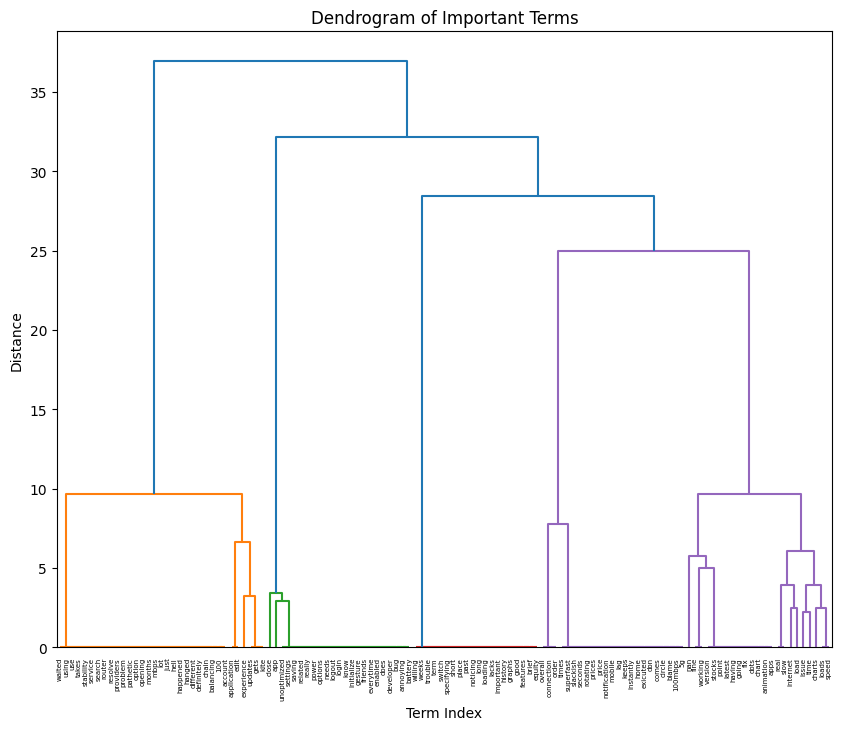

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Load your CSV file
df = pd.read_csv('sentiments.csv')
df['Comment']=df['Comment'][:5]
# Ensure comment column is string type
df['Comment'] = df['Comment'].astype(str)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to your comment data and transform it into a matrix
X = vectorizer.fit_transform(df['Comment'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Calculate TF-IDF scores
tfidf_scores = np.sum(X.toarray(), axis=0)

# Filter terms by TF-IDF score threshold
threshold = 0.01  # Adjust the threshold value
important_terms = [term for term, score in zip(terms, tfidf_scores) if score >= threshold]

# Create a new TF-IDF matrix with important terms
important_X = X[:, np.where(tfidf_scores >= threshold)[0]]

# Calculate cosine similarity between important terms
similarity = cosine_similarity(important_X.T)

# Create a linkage matrix for hierarchical clustering
linkage_matrix = linkage(similarity, method='ward')

# Create a dendrogram with important terms
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, labels=important_terms, leaf_rotation=90)
plt.title('Dendrogram of Important Terms')
plt.xlabel('Term Index')
plt.ylabel('Distance')
plt.show()